<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Feb 8, 2021
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline


In [55]:
# En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteo
# 
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
# url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Actividad1/Guaymas26292.txt'
url = 'https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Actividad1/3061.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29804 entries, 0 to 29803
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   29804 non-null  datetime64[ns]
 1   Precip  29786 non-null  float64       
 2   Evap    1389 non-null   float64       
 3   Tmax    29723 non-null  float64       
 4   Tmin    29724 non-null  float64       
 5   Año     29804 non-null  int64         
 6   Mes     29804 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.6+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1929-11-01     0.0   NaN  26.0  19.0  1929  Nov
1 1929-11-02     0.0   NaN  27.0  18.0  1929  Nov
2 1929-11-03     0.0   NaN  25.0  18.0  1929  Nov
3 1929-11-04     0.0   NaN  24.0  17.0  1929  Nov
4 1929-11-05     0.0   NaN  22.0  15.0  1929  Nov
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
29799 2017-12-27     0.0   NaN  21.5  16.0  2017  Dec
29800 2

Creamos un **Serie de Tiempo**, fijando a la variable *'Fecha'* como nuevo índice del DataFrame. 

In [56]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29804 entries, 1929-11-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  29786 non-null  float64
 1   Evap    1389 non-null   float64
 2   Tmax    29723 non-null  float64
 3   Tmin    29724 non-null  float64
 4   Año     29804 non-null  int64  
 5   Mes     29804 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1929-11-01     0.0   NaN  26.0  19.0  1929  Nov
1929-11-02     0.0   NaN  27.0  18.0  1929  Nov
1929-11-03     0.0   NaN  25.0  18.0  1929  Nov
1929-11-04     0.0   NaN  24.0  17.0  1929  Nov
1929-11-05     0.0   NaN  22.0  15.0  1929  Nov
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2017-12-27     0.0   NaN  21.5  16.0  2017  Dec
2017-12-28     0.0   NaN  24.5  17.0 

In [57]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2018)]


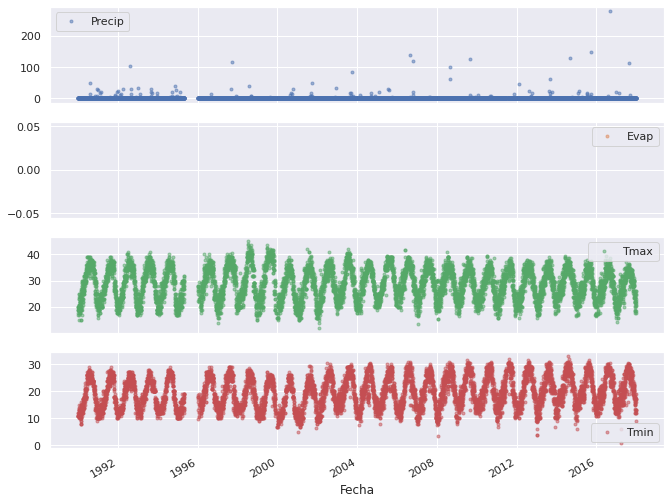

In [58]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)


Variación en Precipitación promedio 60-30 : -0.2098196906644333
Variación en Precipitación promedio 90-30 : -0.07187188657953286
Variación en Precipitación promedio 90-60 : 0.13794780408490043


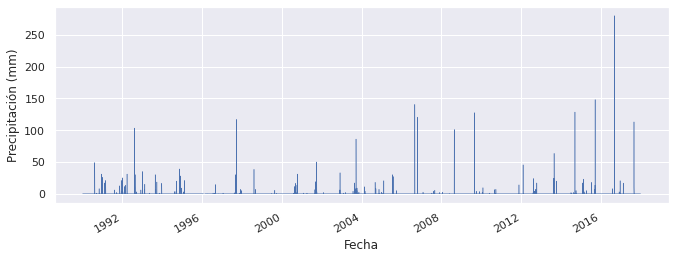

In [59]:
# Graficamos la Precipitación de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()
Precip_ave_30 = df_30.Precip.mean()
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

print('Variación en Precipitación promedio 60-30 :', Precip_ave_60-Precip_ave_30)
print('Variación en Precipitación promedio 90-30 :', Precip_ave_90-Precip_ave_30)
print('Variación en Precipitación promedio 90-60 :', Precip_ave_90-Precip_ave_60)


Variación ºC Tmax promedio 90-60 : 0.21684203258373813


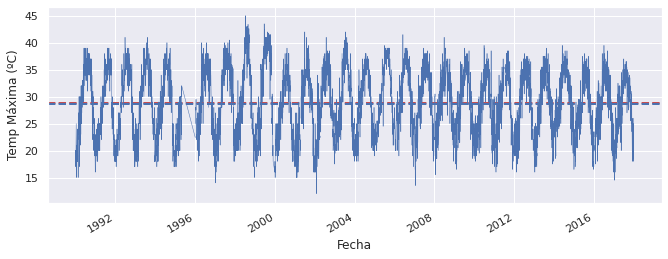

In [60]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC Tmax promedio 90-60 :', Tmax_ave_90-Tmax_ave_60)


Variación ºC Tmin promedio 90-60 : 1.0847311713890448


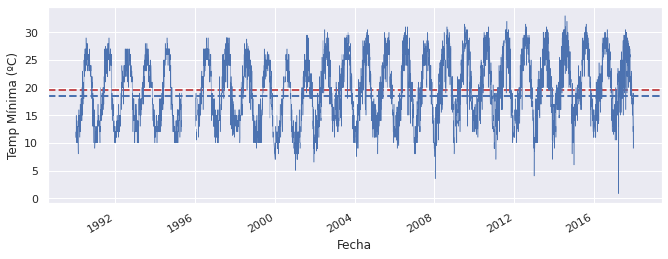

In [61]:
# Graficamos la Tin de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()
plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC Tmin promedio 90-60 :', Tmin_ave_90-Tmin_ave_60)


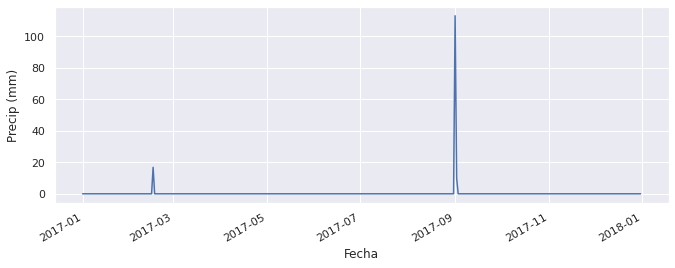

In [62]:
# Investigando un año de datos
ax = df_90.loc['2017', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');


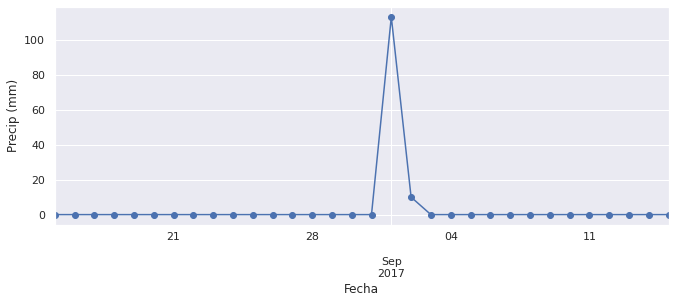

In [63]:
# Investigando un periodo de datos
ax = df_90.loc['2017-08-15':'2017-09-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');


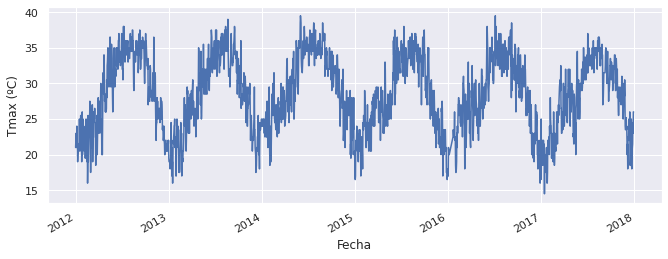

In [64]:
# Investigando un rango de datos
ax = df_90.loc['2012':'2017', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');


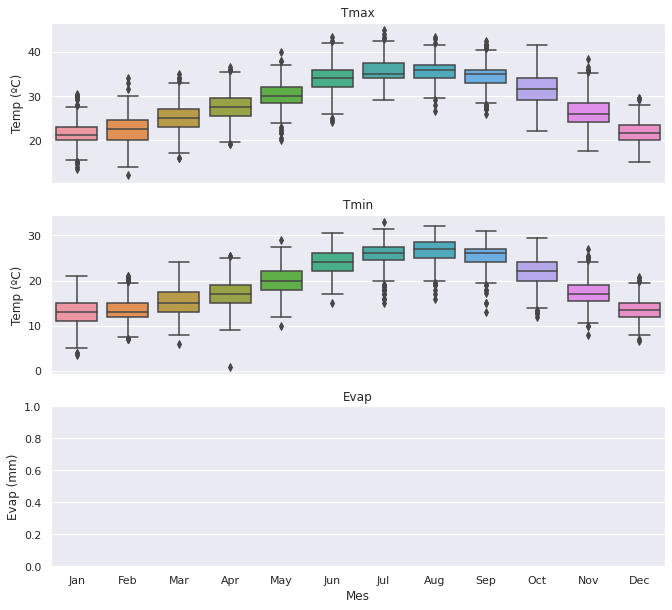

In [65]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')
